Simplest possible example
--------------------------

Compute the fluxes of atmospheric leptons for a standard set of models at a fixed zenith angle.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#import solver related modules
from MCEq.core import MCEqRun
import mceq_config as config
#import primary model choices
import crflux.models as pm

Create an instance of an MCEqRun class. Most options are defined in the `mceq_config` module, and do not require change. Look into `mceq_config.py` or use the documentation.

If the initialization succeeds it will print out some information according to the debug level. 

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


__________

If everything succeeds than the last message should be something like

`MCEqRun::set_primary_model():  HillasGaisser2012 H3a`.


List all available particle species
-----------------------------------

In [3]:
mceq_run.pman.print_particle_tables(0)

Hadrons and stable particles:
"pbar-", "p+"

Mixed:
"pi0", "K_L0", "pi-", "pi+", "K_S0", 
"K-", "K+", "D-", "D+", "Dbar0", 
"D0", "D_s-", "D_s+", "nbar0", "n0", 
"Lambdabar0", "Lambda0"

Resonances:


Leptons:
"e+", "e-", "antinue", "nue", "mu+_l", 
"mu+", "mu+_r", "mu-_l", "mu-", "mu-_r", 
"antinumu", "numu", "antinutau", "nutau", "gamma"

Tracking:
"pi_antinue", "pi_nue", "pi_mu+_l", "pi_mu+_r", "pi_mu-_l", 
"pi_mu-_r", "pi_antinumu", "pi_numu", "k_antinue", "k_nue", 
"k_mu+_l", "k_mu+_r", "k_mu-_l", "k_mu-_r", "k_antinumu", 
"k_numu", "mulr_antinue", "mulr_nue", "mulr_antinumu", "mulr_numu", 
"mu_h0_antinue", "mu_h0_nue", "mu_h0_antinumu", "mu_h0_numu", "mu_antinue", 
"mu_nue", "mu_antinumu", "mu_numu", "K0_antinue", "K0_nue", 
"K0_mu+", "K0_mu-", "K0_antinumu", "K0_numu", "prcas_antinue", 
"prcas_nue", "prcas_mu+", "prcas_mu-", "prcas_antinumu", "prcas_numu", 
"prcas_antinutau", "prcas_nutau", "prres_antinue", "prres_nue", "prres_mu+", 
"prres_mu-", "prres_antinumu", "prres_numu"



Define variables and angles
-------------------------

In [4]:
#Power of energy to scale the flux (the results will be returned as E**mag * flux)
mag = 3

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid

#Dictionary for results
flux = {}

#Define a zenith angle, counted positively from vertical direction. Theta = 0. means vertical, theta = 90. horizontal
theta = 60.

Calculate average flux
---------------------

In [5]:
#Set the zenith angle
mceq_run.set_theta_deg(theta)
#Run the solver
mceq_run.solve()

Obtain solution at the surface
-------------------------------

The fluxes of the particle (e.g., $\mu^+$) and the anti-particle ($\mu^-$) are summed in this example.

In [6]:
#_conv means conventional (mostly pions and kaons)
mu_conv = (mceq_run.get_solution('conv_mu+', mag)
           + mceq_run.get_solution('conv_mu-', mag))

# _pr means prompt (the mother of the muon had a critical energy
# higher or equal to that of a D meson. Includes all charm and direct resonance
# contribution)
mu_pr = (mceq_run.get_solution('pr_mu+', mag)
         + mceq_run.get_solution('pr_mu-', mag))

# total means conventional + prompt
mu_total = (mceq_run.get_solution('total_mu+', mag)
            + mceq_run.get_solution('total_mu-', mag))

# Muon charge ratio
mu_charge = (mceq_run.get_solution('total_mu+', mag)
            / mceq_run.get_solution('total_mu-', mag))

# same meaning of prefixes for muon neutrinos as for muons
numu_conv = (mceq_run.get_solution('conv_numu', mag)
             + mceq_run.get_solution('conv_antinumu', mag))

numu_pr = (mceq_run.get_solution('pr_numu', mag)
           + mceq_run.get_solution('pr_antinumu', mag))

numu_total = (mceq_run.get_solution('total_numu', mag)
              + mceq_run.get_solution('total_antinumu', mag))

numu_ratio = (mceq_run.get_solution('total_numu', mag)
              / mceq_run.get_solution('total_antinumu', mag))

# same meaning of prefixes for electron neutrinos as for muons
nue_conv = (mceq_run.get_solution('conv_nue', mag)
            + mceq_run.get_solution('conv_antinue', mag))

nue_pr = (mceq_run.get_solution('pr_nue', mag)
          + mceq_run.get_solution('pr_antinue', mag))

nue_total = (mceq_run.get_solution('total_nue', mag)
             + mceq_run.get_solution('total_antinue', mag))

nue_ratio = (mceq_run.get_solution('total_nue', mag)
             / mceq_run.get_solution('total_antinue', mag))



# since there are no conventional tau neutrinos, prompt=total
nutau_total = (mceq_run.get_solution('total_nutau', mag)
            + mceq_run.get_solution('total_antinutau', mag))
nutau_pr = (mceq_run.get_solution('pr_nutau', mag)
            + mceq_run.get_solution('pr_antinutau', mag))

Plot using matplotlib
----------------------

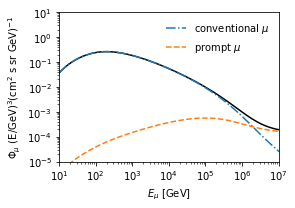

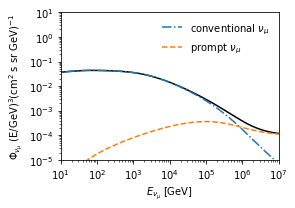

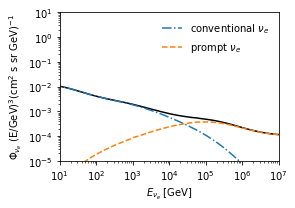

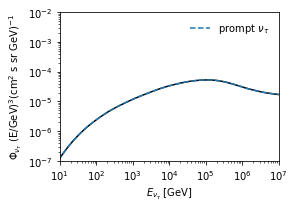

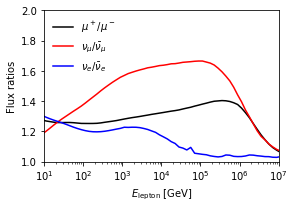

In [7]:
# for pref, lab in [('numu_',r'\nu_\mu'), ('nue_',r'\nu_e')]:

#Muons
plt.figure(figsize=(4.2, 3))
plt.loglog(e_grid, mu_total, color='k', ls='-', lw=1.5)
plt.loglog(e_grid, mu_conv, ls='-.', lw=1.5,
           label=r'conventional $\mu$')
plt.loglog(e_grid, mu_pr, ls='--', lw=1.5, 
           label=r'prompt $\mu$')
plt.xlim(10,1e7)
plt.ylim(1e-5,10)
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) +" }$" + 
           "(cm$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc='upper right',frameon=False,numpoints=1,fontsize='medium')
plt.tight_layout()

#To save the plot use
# plt.savefig('H3a_60_sib23c_whatever.pdf')

#Muon neutrinos
plt.figure(figsize=(4.2, 3))
plt.loglog(e_grid, numu_total, color='k', ls='-', lw=1.5)
plt.loglog(e_grid, numu_conv, ls='-.', lw=1.5,
           label=r'conventional $\nu_\mu$')
plt.loglog(e_grid, numu_pr, ls='--', lw=1.5, 
           label=r'prompt $\nu_\mu$')
plt.xlim(10,1e7)
plt.ylim(1e-5,10)
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_\mu}$ (E/GeV)$^{" + str(mag) +" }$" + 
           "(cm$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc='upper right',frameon=False,numpoints=1,fontsize='medium')
plt.tight_layout()

#Electron neutrinos
plt.figure(figsize=(4.2, 3))
plt.loglog(e_grid, nue_total, color='k', ls='-', lw=1.5)
plt.loglog(e_grid, nue_conv, ls='-.', lw=1.5,
           label=r'conventional $\nu_e$')
plt.loglog(e_grid, nue_pr, ls='--', lw=1.5, 
           label=r'prompt $\nu_e$')
plt.xlim(10,1e7)
plt.ylim(1e-5,10)
plt.xlabel(r"$E_{\nu_e}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_e}$ (E/GeV)$^{" + str(mag) +" }$" + 
           "(cm$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc='upper right',frameon=False,numpoints=1,fontsize='medium')
plt.tight_layout()

#Tau neutrinos
plt.figure(figsize=(4.2, 3))
plt.loglog(e_grid, nutau_total, color='k', ls='-', lw=1.5)
plt.loglog(e_grid, nutau_pr, ls='--', lw=1.5, 
           label=r'prompt $\nu_\tau$')
plt.xlim(10,1e7)
plt.ylim(1e-7,1e-2)
plt.xlabel(r"$E_{\nu_\tau}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_\tau}$ (E/GeV)$^{" + str(mag) +" }$" + 
           "(cm$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc='upper right',frameon=False,numpoints=1,fontsize='medium')
plt.tight_layout()

#Muons
plt.figure(figsize=(4.2, 3))
plt.semilogx(e_grid, mu_charge, color='k', ls='-', lw=1.5, label=r'$\mu^+/\mu^-$')
plt.semilogx(e_grid, numu_ratio, color='r', ls='-', lw=1.5, label=r'$\nu_\mu/\bar{\nu}_\mu$')
plt.semilogx(e_grid, nue_ratio, color='b', ls='-', lw=1.5, label=r'$\nu_e/\bar{\nu}_e$')
# plt.semilogx(e_grid, 0.1*numu_total/nue_total, color='cyan', ls='-', 
#              lw=1.5, label=r'$0.1 \cdot \nu_\mu/\nu_e$')
plt.xlim(10,1e7)
plt.ylim(1,2)
plt.xlabel(r"$E_{\rm lepton}$ [GeV]")
plt.ylabel(r"Flux ratios")
plt.legend(loc='upper left',frameon=False,numpoints=1,fontsize='medium')
plt.tight_layout()

Save as in ASCII file for other types of processing
-----------------------------------------------------

The block below will save the results in an ASCII file for further processing.

In [18]:
np.savetxt(open('H3a_theta_60_sib23c.txt','w'),
zip(e_grid, 
    mu_conv,mu_pr,mu_total,
    numu_conv,numu_pr,numu_total,
    nue_conv,nue_pr,nue_total,
    nutau_pr),
fmt='%6.5E',
header=('lepton flux scaled with E**{0}. Order (E, mu_conv, mu_pr, mu_total, ' +
        'numu_conv, numu_pr, numu_total, nue_conv, nue_pr, nue_total, ' +
        'nutau_pr').format(mag)
)